# 음주 여부에 따라 건강검진 수치 차이가 있을까?

# 신장과 허리둘레의 크기는 체중과 상관관계가 있을까?

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
import os

if os.name == 'nt':
    plt.rc('font', family="Malgun Gothic")
else:
    plt.rc('font', family="AppleGothic")
    
plt.rc("axes", unicode_minus=False)

In [6]:
%config InlineBackend.figure_format = 'retina'

# 데이터 불러오기

In [91]:
df = pd.read_csv("NHIS_OPEN_GJ_2017_v1.1.csv", encoding='cp949') # pandas는 기본적으로  utf-8인코딩 기반
df.shape

(1000000, 34)

In [12]:
df.head(3)

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,8,43,170,75,90.0,1.0,1.0,...,40.0,1.0,Y,Y,NaN,NaN,NaN,NaN,Y,2018-11-26
1,2017,2,1,7,11,180,80,89.0,0.9,1.2,...,27.0,3.0,N,Y,NaN,NaN,NaN,NaN,NaN,2018-11-26
2,2017,3,1,9,41,165,75,91.0,1.2,1.5,...,68.0,1.0,N,N,NaN,NaN,NaN,NaN,NaN,2018-11-26


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg단위)     1000000 non-null  int64  
 7   허리둘레          999734 non-null   float64
 8   시력(좌)         999817 non-null   float64
 9   시력(우)         999811 non-null   float64
 10  청력(좌)         999842 non-null   float64
 11  청력(우)         999844 non-null   float64
 12  수축기혈압         999981 non-null   float64
 13  이완기혈압         999982 non-null   float64
 14  식전혈당(공복혈당)    999958 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999955 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [16]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [20]:
df.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

# 결측치 보기

In [22]:
# 결측치 개수, 결측치=True
df.isnull().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)             0
체중(5Kg단위)             0
허리둘레                266
시력(좌)               183
시력(우)               189
청력(좌)               158
청력(우)               156
수축기혈압                19
이완기혈압                18
식전혈당(공복혈당)           42
총콜레스테롤               43
트리글리세라이드             45
HDL콜레스테롤             44
LDL콜레스테롤           2912
혈색소                  52
요단백                4592
혈청크레아티닌              43
(혈청지오티)AST           41
(혈청지오티)ALT           42
감마지티피                42
흡연상태                144
음주여부                536
구강검진수검여부              0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               621422
데이터공개일자               0
dtype: int64

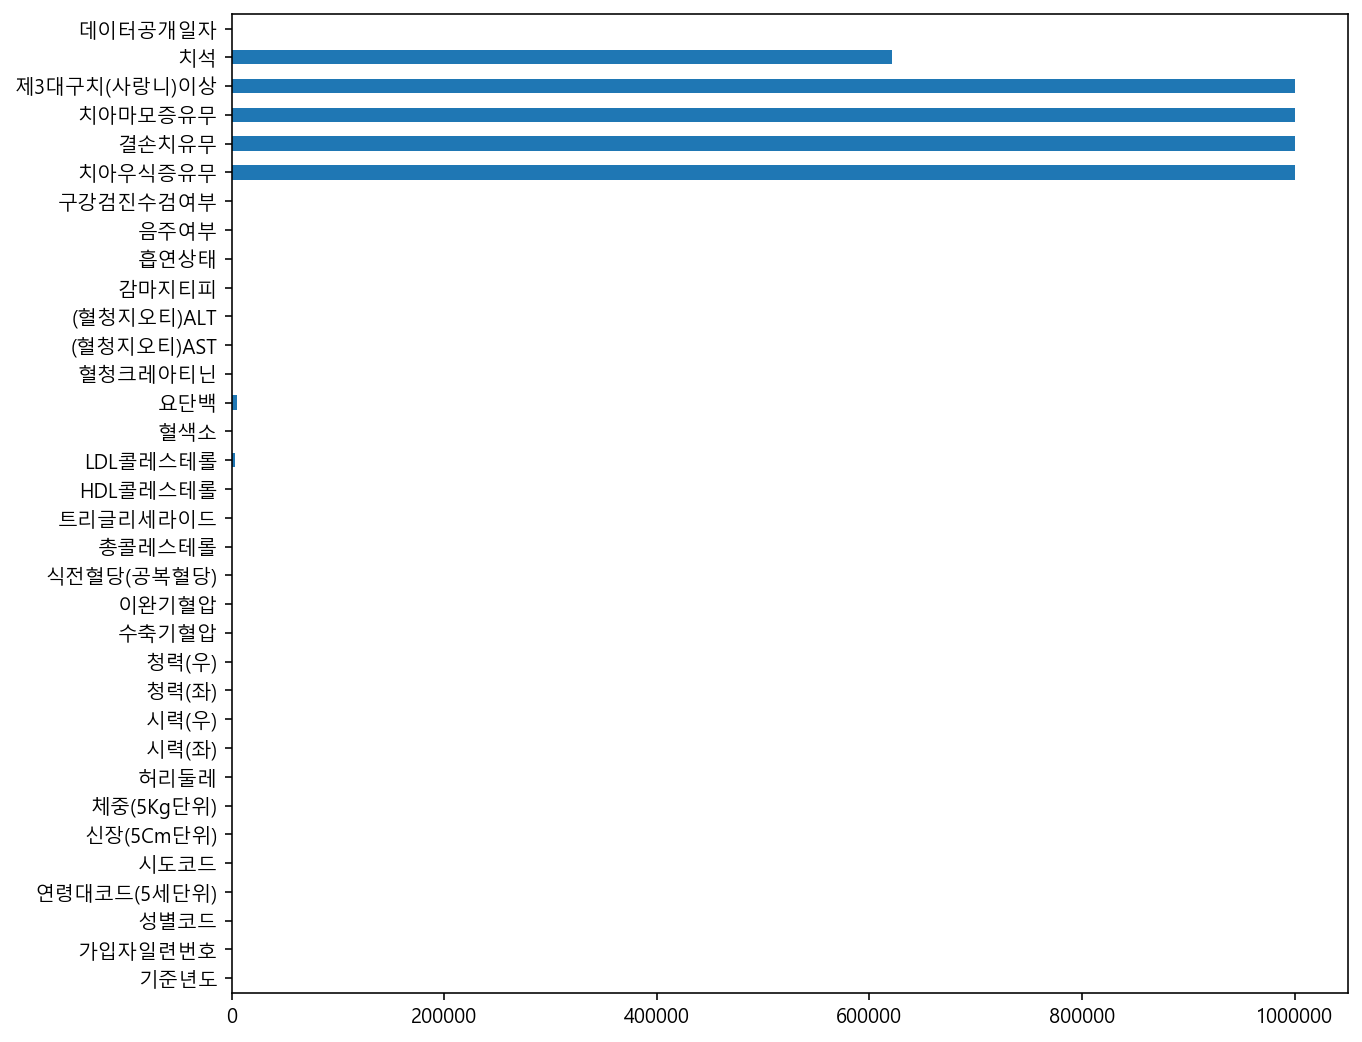

In [29]:
df.isna().sum().plot.barh(figsize=(10,9))

# 일부 데이터 요약하기

In [32]:
# 한번에 두개 이상 컬럼 가져올 때 --> df[[]] 리스트 구조로 만들어야 한다
df[["(혈청지오티)ALT", "(혈청지오티)AST", "기준년도"]].head()

,(혈청지오티)ALT,(혈청지오티)AST,기준년도
0,35.0,21.0,2017
1,36.0,20.0,2017
2,32.0,47.0,2017
3,34.0,29.0,2017
4,12.0,19.0,2017


In [34]:
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].describe()

,(혈청지오티)ALT,(혈청지오티)AST
count,999958.000000,999959.000000
mean,25.749509,25.994671
std,26.294770,23.587469
min,1.000000,1.000000
25%,15.000000,19.000000
50%,20.000000,23.000000
75%,29.000000,28.000000
max,7210.000000,9999.000000


# value_counts로 집계하기

In [36]:
df["성별코드"].value_counts()

1    530410
2    469590
Name: 성별코드, dtype: int64

In [37]:
df["흡연상태"].value_counts()

1.0    607942
3.0    215702
2.0    176212
Name: 흡연상태, dtype: int64

# groupby와 pivot_table 사용하기
- groupby가 조금 더 빠르다

## groupby

In [42]:
df.groupby(["성별코드"])["가입자일련번호"].count()

성별코드
1    530410
2    469590
Name: 가입자일련번호, dtype: int64

In [43]:
df.groupby(["성별코드", "음주여부"])["가입자일련번호"].count()

성별코드  음주여부
1     N       173612
      Y       356587
2     N       326827
      Y       142438
Name: 가입자일련번호, dtype: int64

In [46]:
df.groupby(["성별코드", "음주여부"])["감마지티피"].mean()

성별코드  음주여부
1     N       34.739868
      Y       56.610981
2     N       22.612408
      Y       25.001018
Name: 감마지티피, dtype: float64

In [48]:
df.groupby(["성별코드", "음주여부"])["감마지티피"].describe()

count       mean        std  min   25%   50%   75%    max
성별코드 음주여부                                                              
1    N     173604.0  34.739868  37.606197  1.0  18.0  25.0  38.0  999.0
     Y     356576.0  56.610981  68.851128  1.0  24.0  37.0  63.0  999.0
2    N     326813.0  22.612408  25.203579  1.0  13.0  17.0  24.0  999.0
     Y     142429.0  25.001018  36.725100  1.0  13.0  17.0  25.0  999.0

In [51]:
df.groupby(["성별코드", "음주여부"])["감마지티피"].agg(["count", "mean", "median"])

count       mean  median
성별코드 음주여부                           
1    N     173604  34.739868    25.0
     Y     356576  56.610981    37.0
2    N     326813  22.612408    17.0
     Y     142429  25.001018    17.0

## pivot_table

In [53]:
df.pivot_table(index="음주여부", values="가입자일련번호", aggfunc="count")

,가입자일련번호
음주여부,
N,500439
Y,499025


In [54]:
pd.pivot_table(df, index="음주여부", values="감마지티피") # 기본은 mean

,감마지티피
음주여부,
N,26.819650
Y,47.588675


In [55]:
pd.pivot_table(df, index="음주여부", values="감마지티피", aggfunc=["mean", "median"])

,mean,median
,감마지티피,감마지티피
음주여부,,
N,26.819650,19.0
Y,47.588675,30.0


In [57]:
pd.pivot_table(df, index=["성별코드", "음주여부"], values="감마지티피", aggfunc="describe")

25%   50%   75%     count    max       mean  min        std
성별코드 음주여부                                                              
1    N     18.0  25.0  38.0  173604.0  999.0  34.739868  1.0  37.606197
     Y     24.0  37.0  63.0  356576.0  999.0  56.610981  1.0  68.851128
2    N     13.0  17.0  24.0  326813.0  999.0  22.612408  1.0  25.203579
     Y     13.0  17.0  25.0  142429.0  999.0  25.001018  1.0  36.725100

# 전체 데이터 시각화하기
- 100만개가 넘는 데이터 사용 시에는 seaborn과 같은 고급 통계 연산을 하는 그래프는 속도가 느리다.
- 따라서, groupby나 pivot_table을 활용하는 것이 좋다.

## 히스토그램

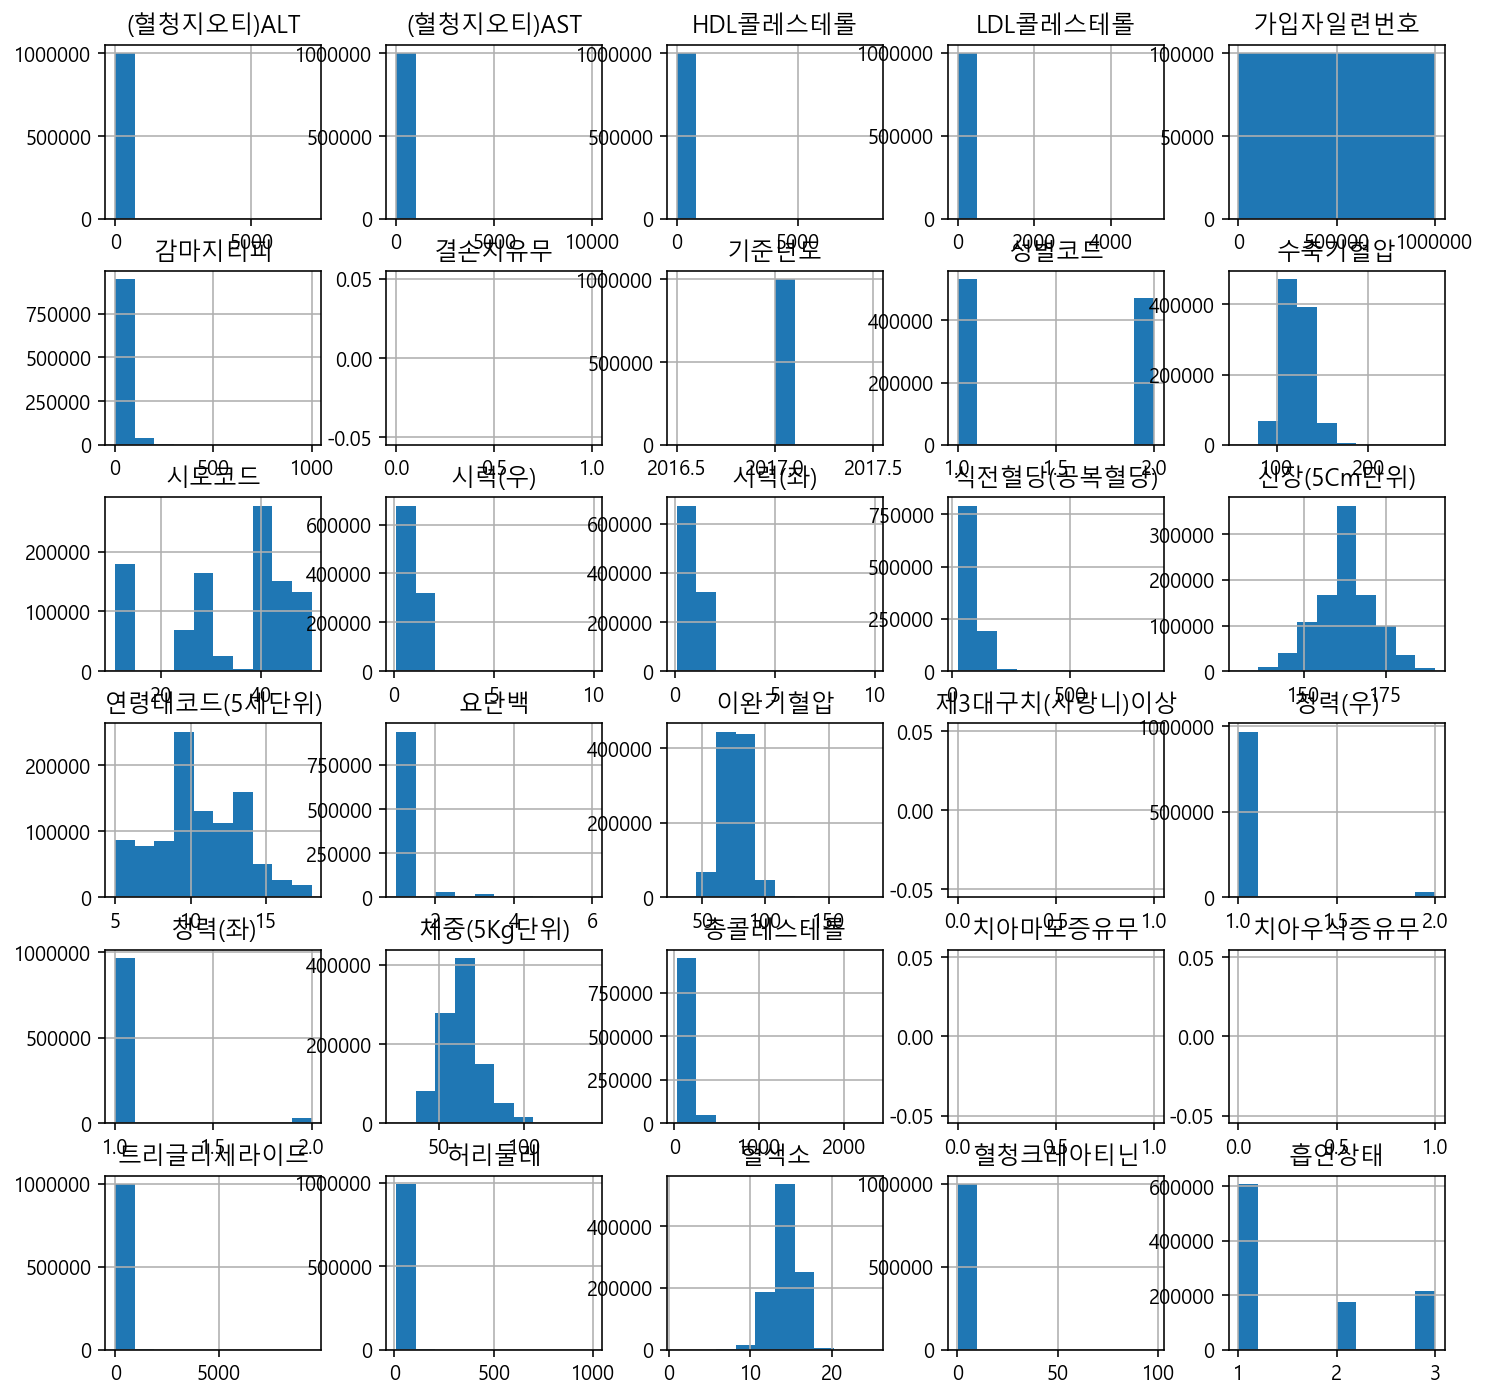

In [60]:
h = df.hist(figsize=(12,12))

## 슬라이싱을 사용한 히스토그램

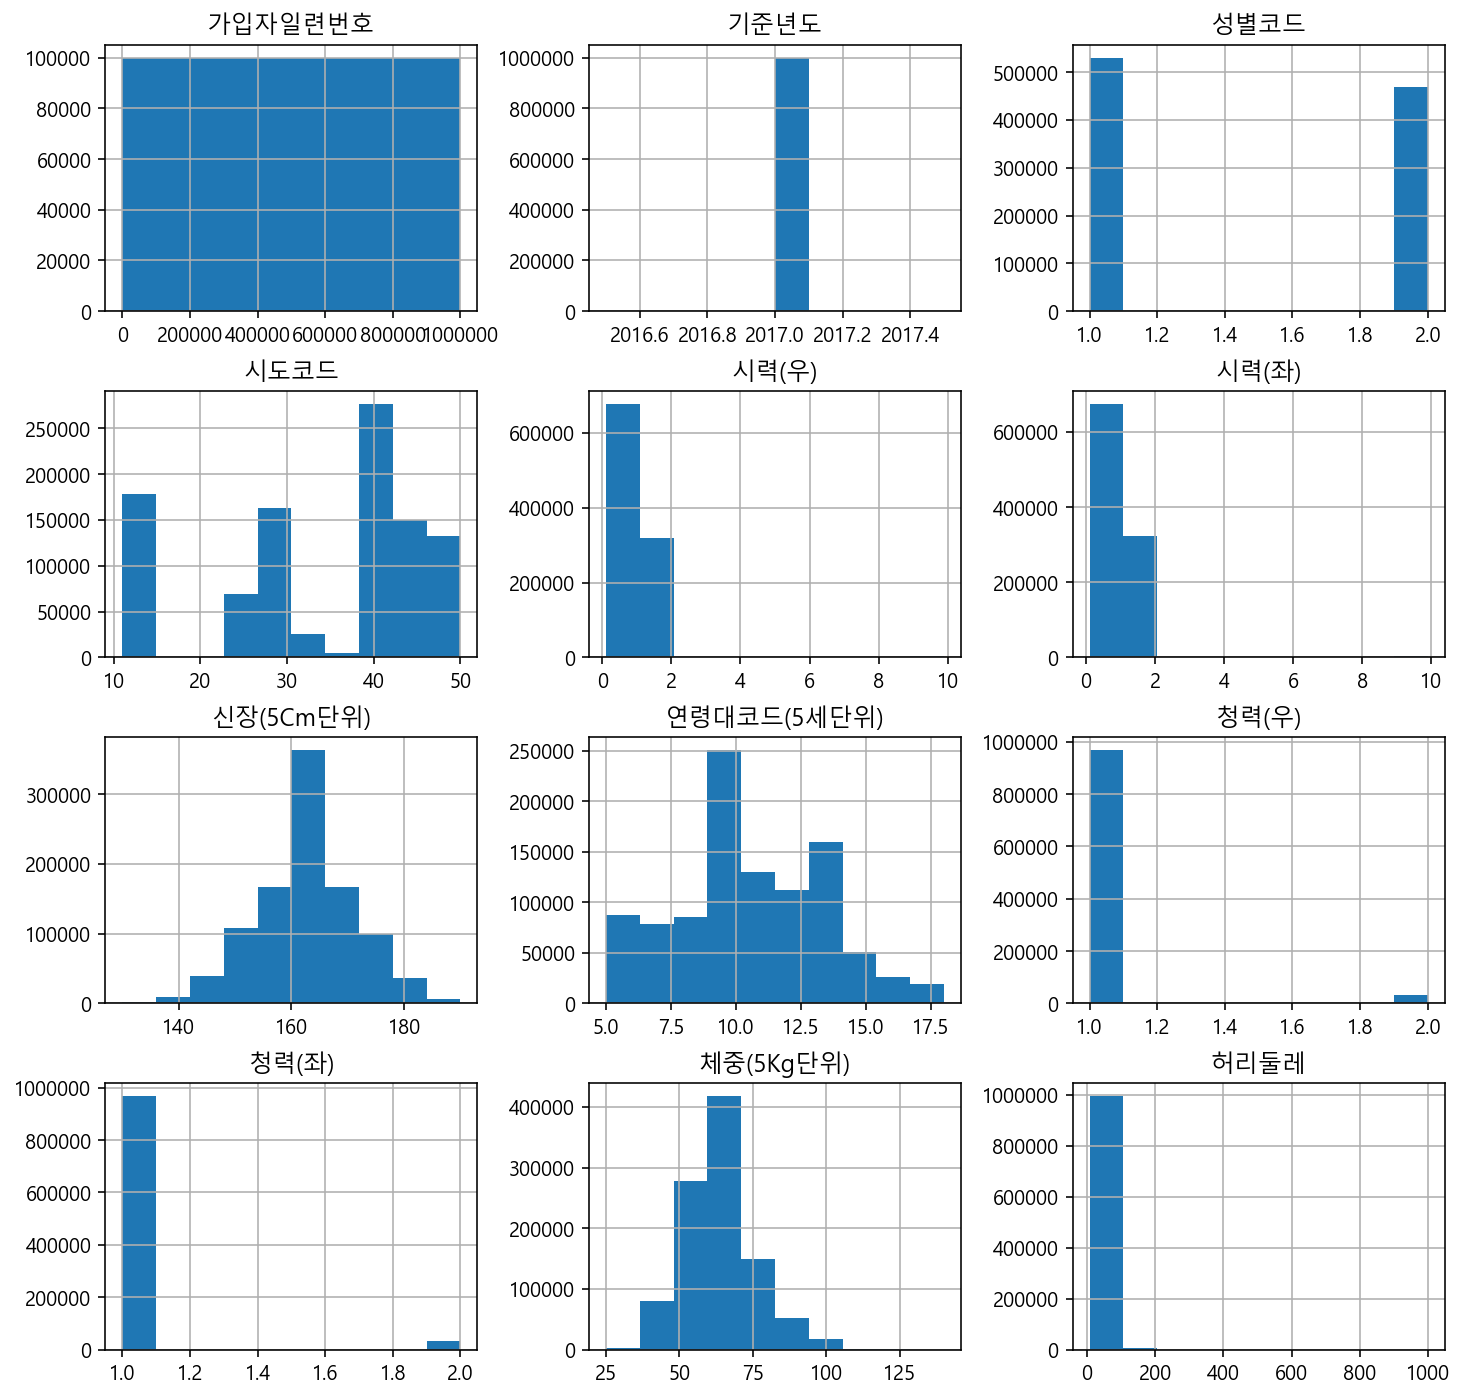

In [61]:
# loc는 인덱스 명으로 접근, iloc는 인덱스로 접근
h = df.iloc[:, :12].hist(figsize=(12,12))

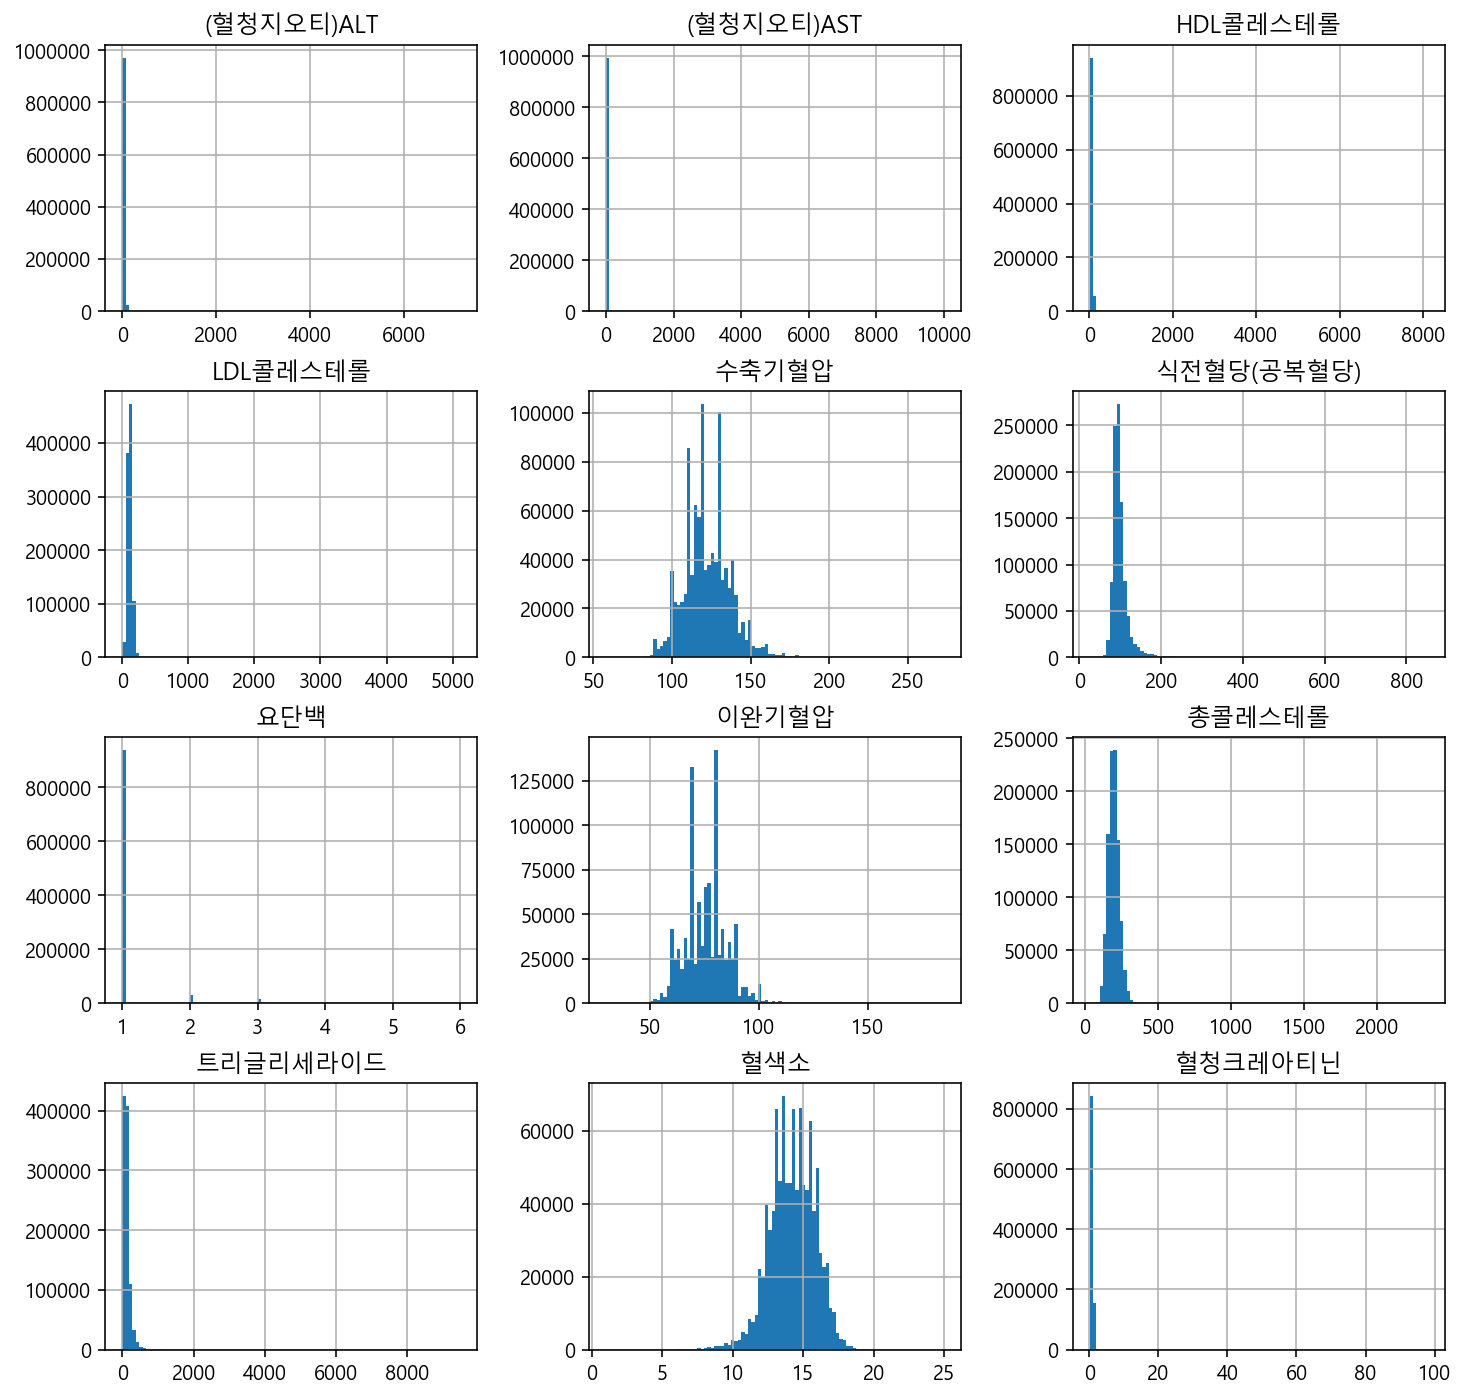

In [67]:
h = df.iloc[:, 12:24].hist(figsize=(12,12), bins=100) # bins는 막대수 조절을 통해 더 자세하게 시각화 가능

# seaborn 활용한 시각화

In [75]:
df_sample = df.sample(1000, random_state=1) # random_state=1를 지정하면, 항상 같은 값을 가져온다.
df_sample.head(2)

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
276826,2017,276827,1,12,41,160,55,77.0,0.9,0.9,...,38.0,3.0,Y,N,NaN,NaN,NaN,NaN,NaN,2018-11-26
849425,2017,849426,1,9,31,170,75,89.9,1.0,1.0,...,28.0,3.0,Y,Y,NaN,NaN,NaN,NaN,Y,2018-11-26


# 범주형(카테고리) 데이터 시각화

## countplot - 음주여부

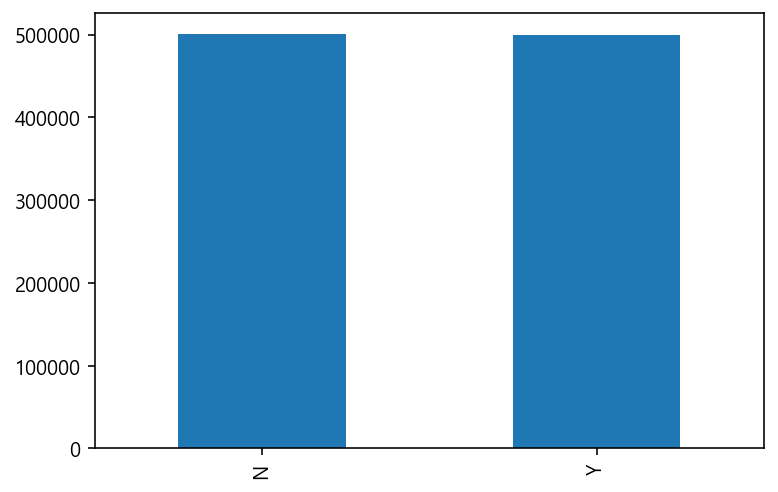

In [79]:
df["음주여부"].value_counts().plot.bar()

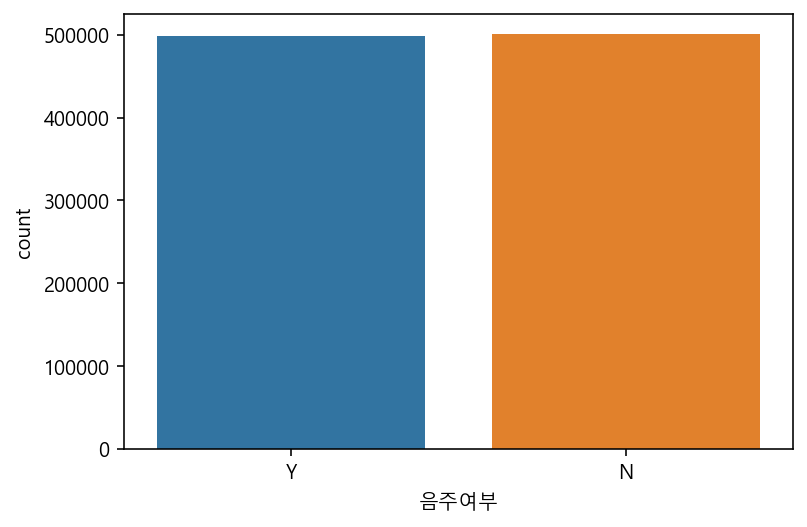

In [80]:
sns.countplot(data=df, x="음주여부")

## hue 사용하기

In [123]:
sns.set(font_scale=1, font="Malgun Gothic")

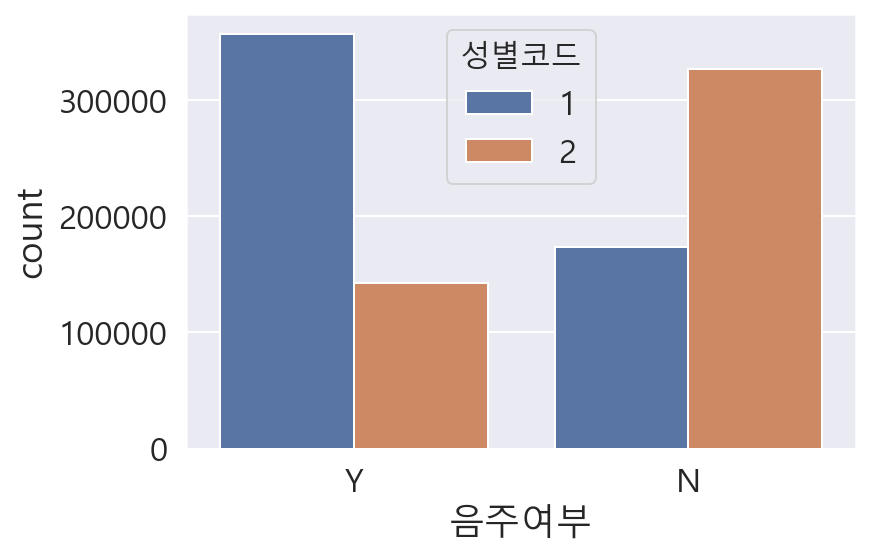

In [84]:
sns.countplot(data=df, x="음주여부", hue="성별코드")

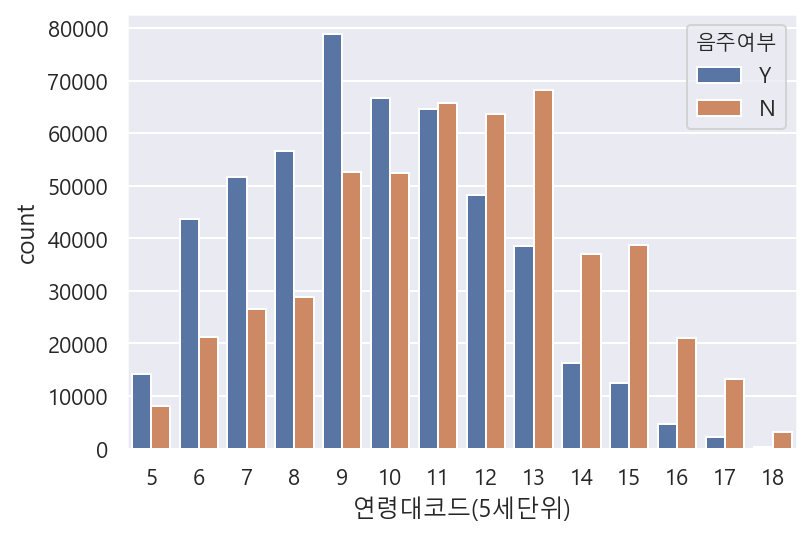

In [88]:
sns.countplot(data=df, x="연령대코드(5세단위)", hue="음주여부")

## countplot - 키와 몸무게

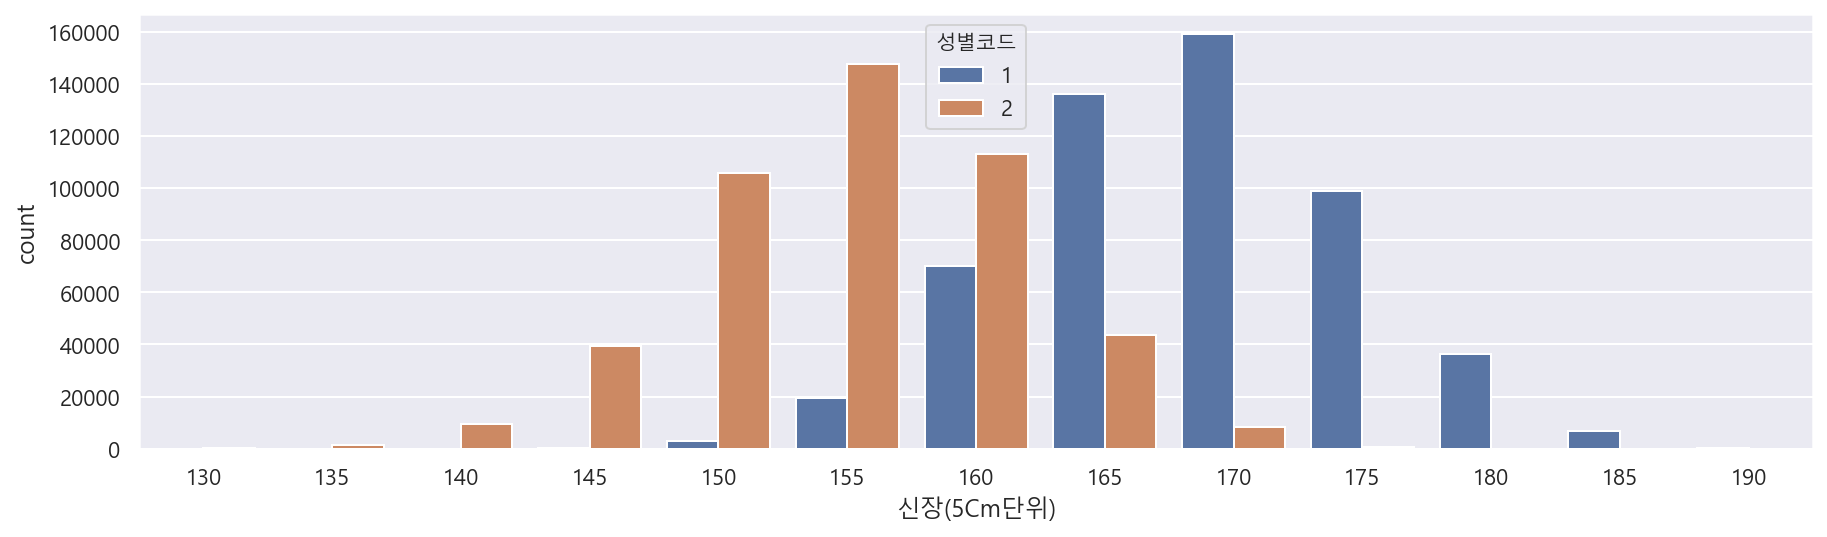

In [97]:
plt.figure(figsize=(15,4))
sns.countplot(data=df, x="신장(5Cm단위)", hue="성별코드")

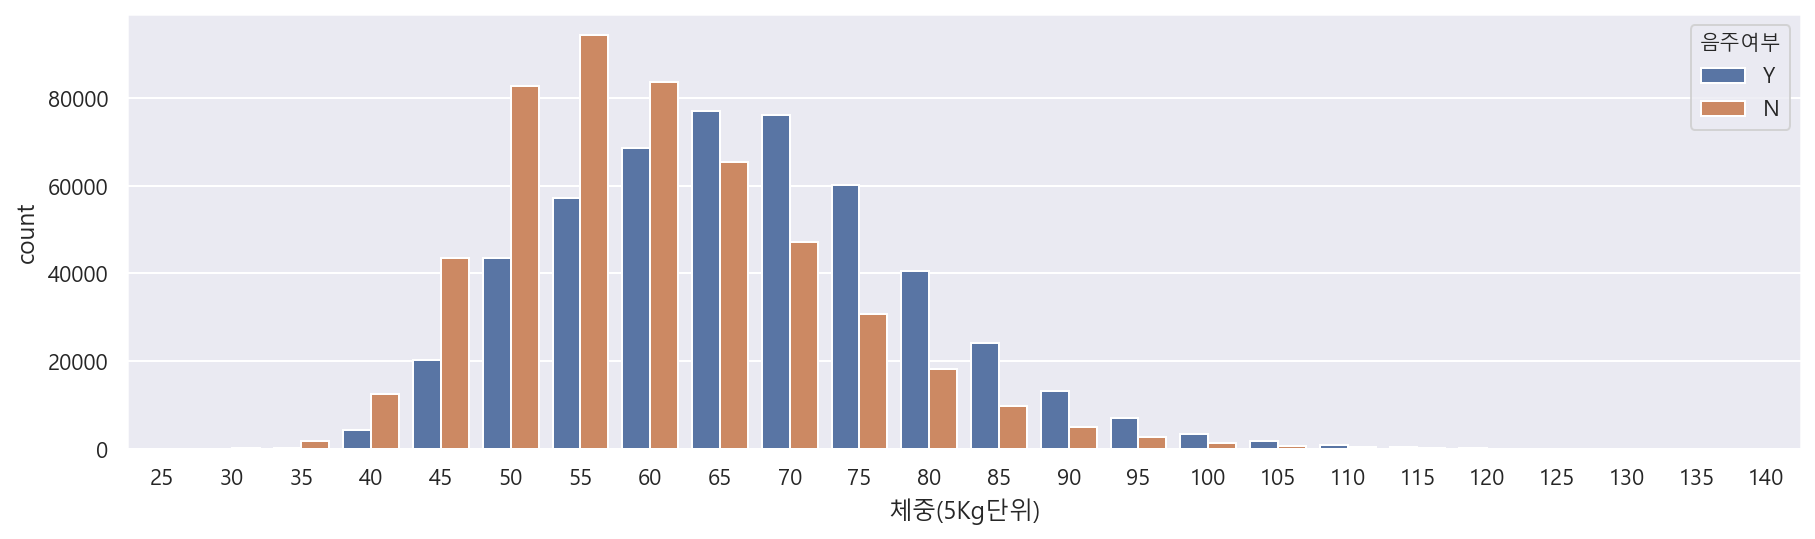

In [100]:
plt.figure(figsize=(15,4))
sns.countplot(data=df, x="체중(5Kg단위)", hue="음주여부")
# 음주하는 사람이 안하는 사람들보다 대체적으로 체중이 많이 나간다.

## barplot - 수치형 vs 범주형 데이터 시각화

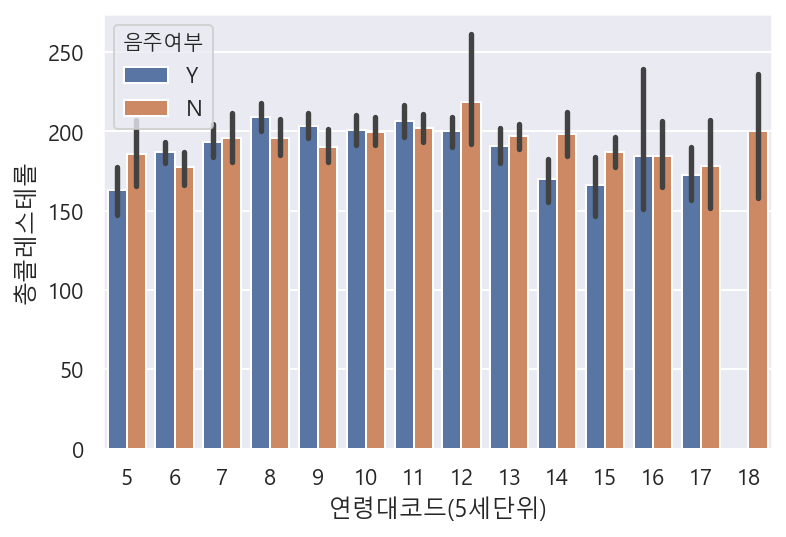

In [104]:
x = sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="총콜레스테롤", hue="음주여부")

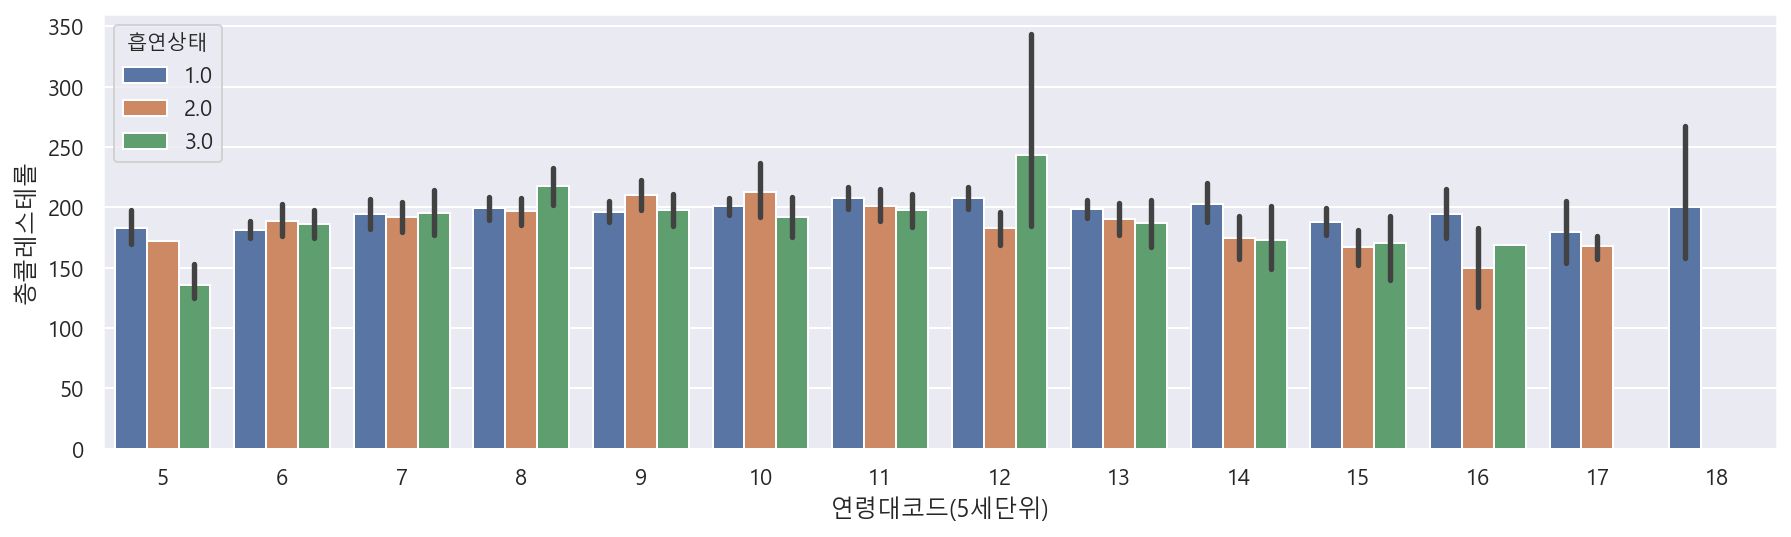

In [106]:
plt.figure(figsize=(15,4))
x = sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="총콜레스테롤", hue="흡연상태")
# 흡연상태 1=흡연중

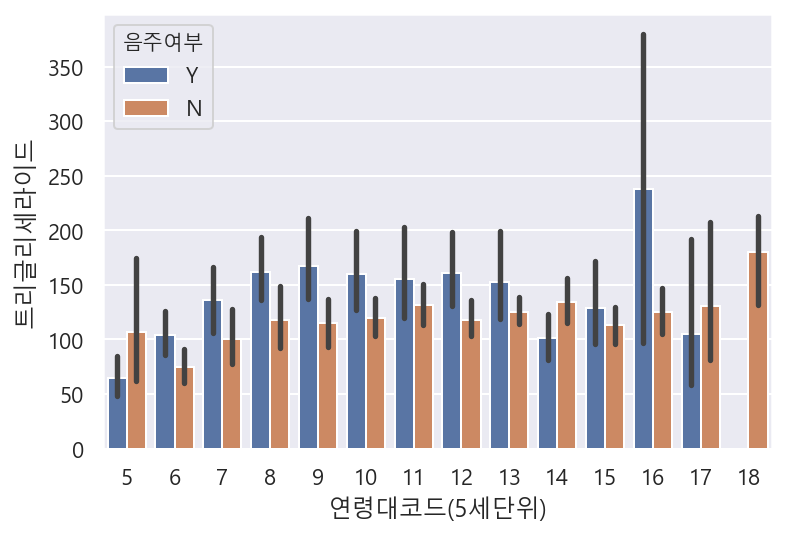

In [108]:
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="트리글리세라이드", hue="음주여부")

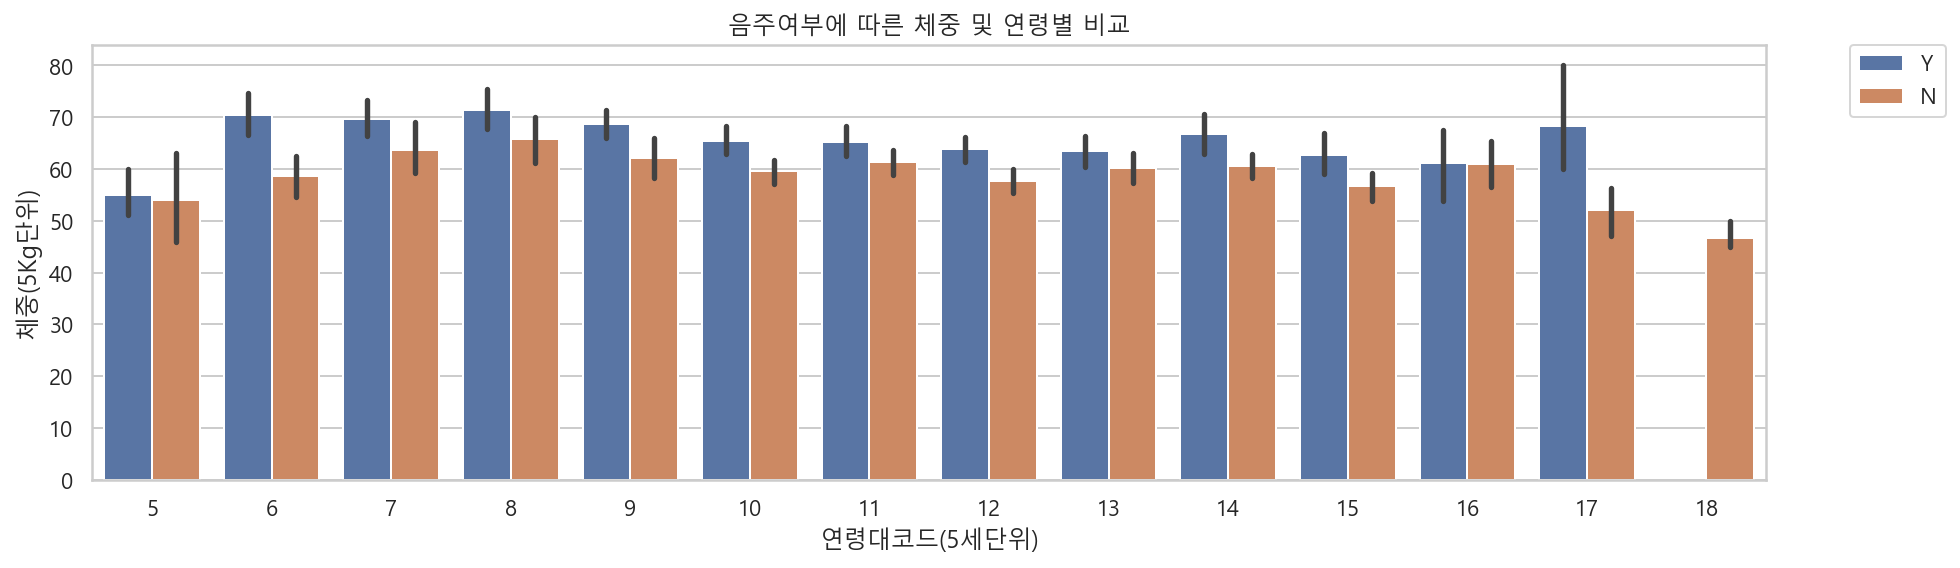

In [119]:
plt.figure(figsize=(15,4))
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="체중(5Kg단위)", hue="음주여부")
plt.title("음주여부에 따른 체중 및 연령별 비교")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## lineplot, pointplot

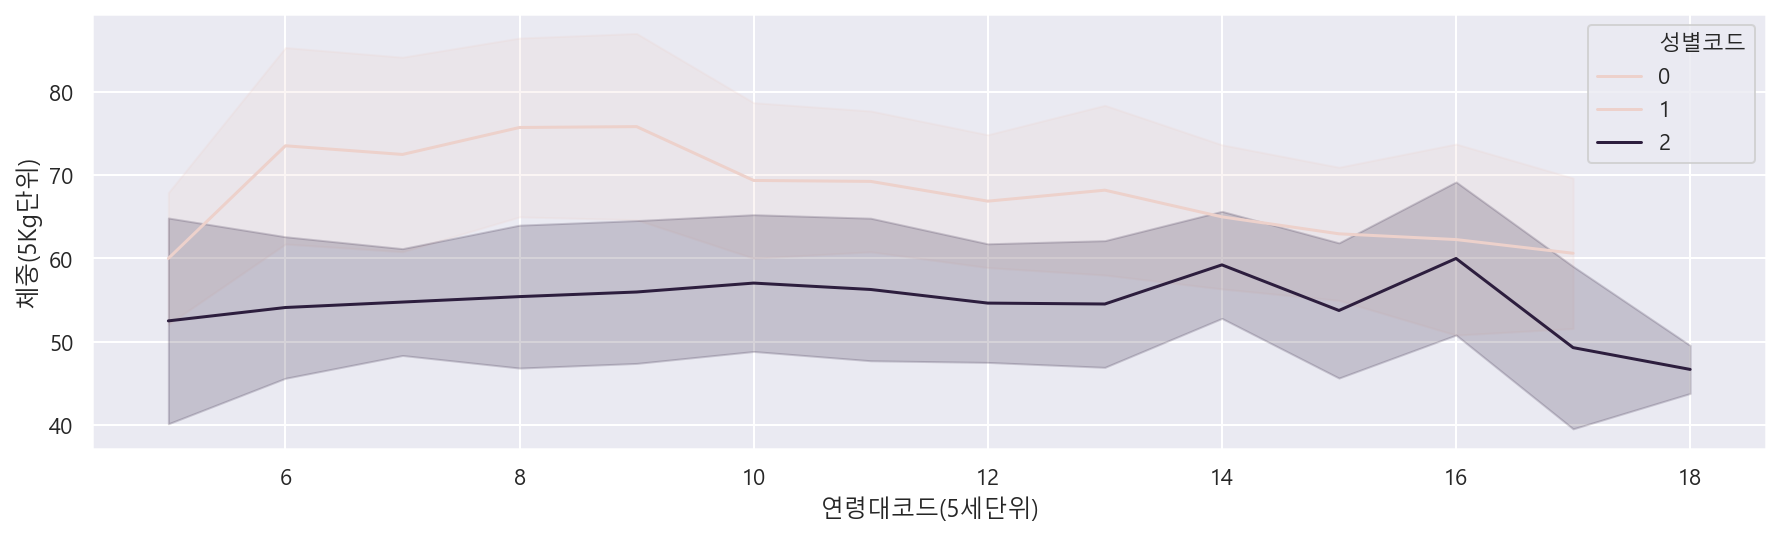

In [127]:
plt.figure(figsize=(15,4))
x = sns.lineplot(data=df_sample, x="연령대코드(5세단위)", y="체중(5Kg단위)", hue="성별코드", ci="sd")
# ci="sd" 표준편차, 디폴트값은 신뢰구간

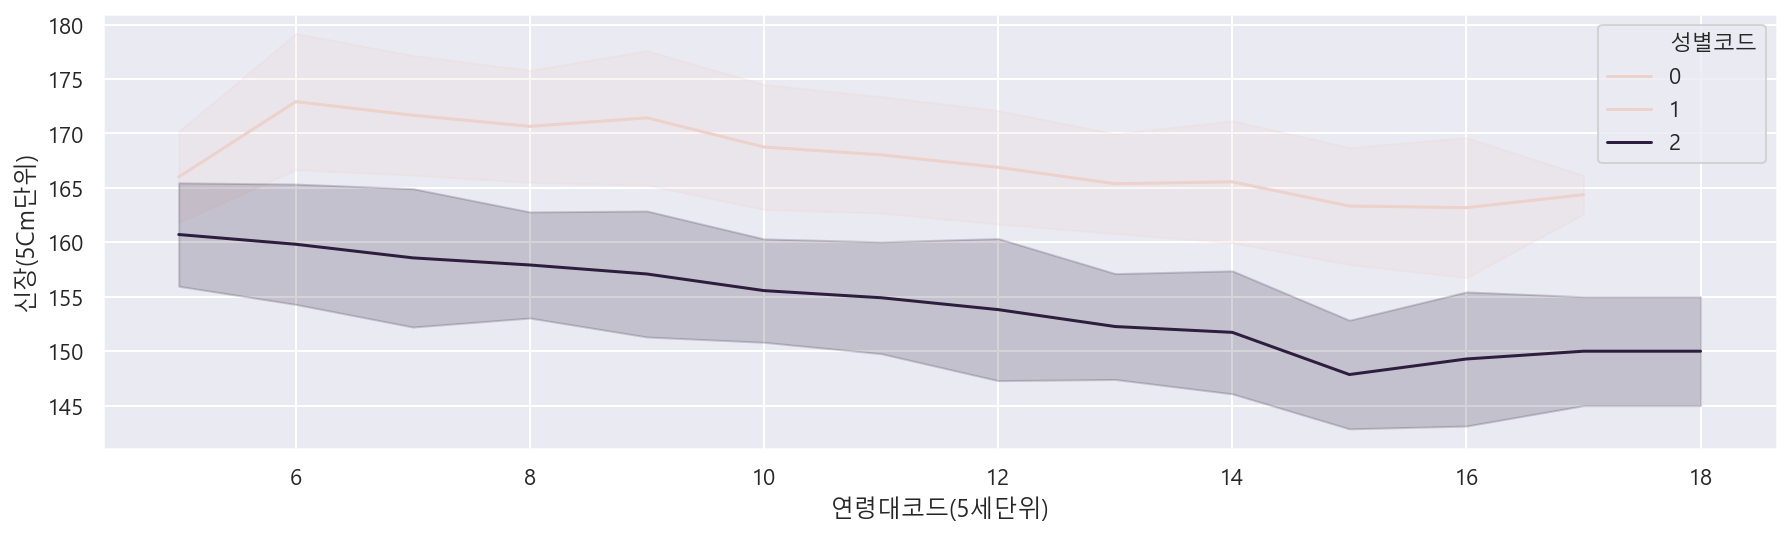

In [128]:
plt.figure(figsize=(15,4))
x = sns.lineplot(data=df_sample, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="성별코드", ci="sd")
# ci="sd" 표준편차, 디폴트값은 신뢰구간

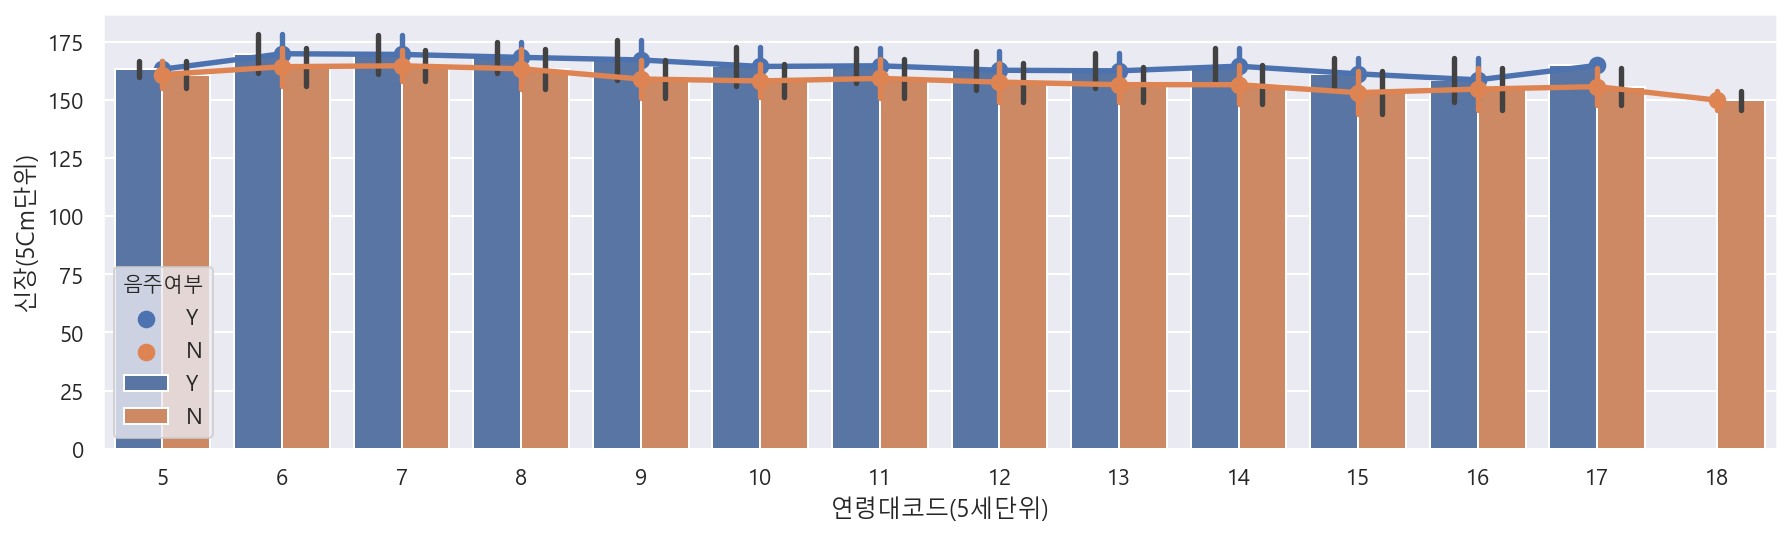

In [133]:
plt.figure(figsize=(15,4))
sns.barplot(data=df_sample, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="음주여부", ci="sd")
sns.pointplot(data=df_sample, x="연령대코드(5세단위)", y="신장(5Cm단위)", hue="음주여부", ci="sd")
# ci="sd" 표준편차, 디폴트값은 신뢰구간

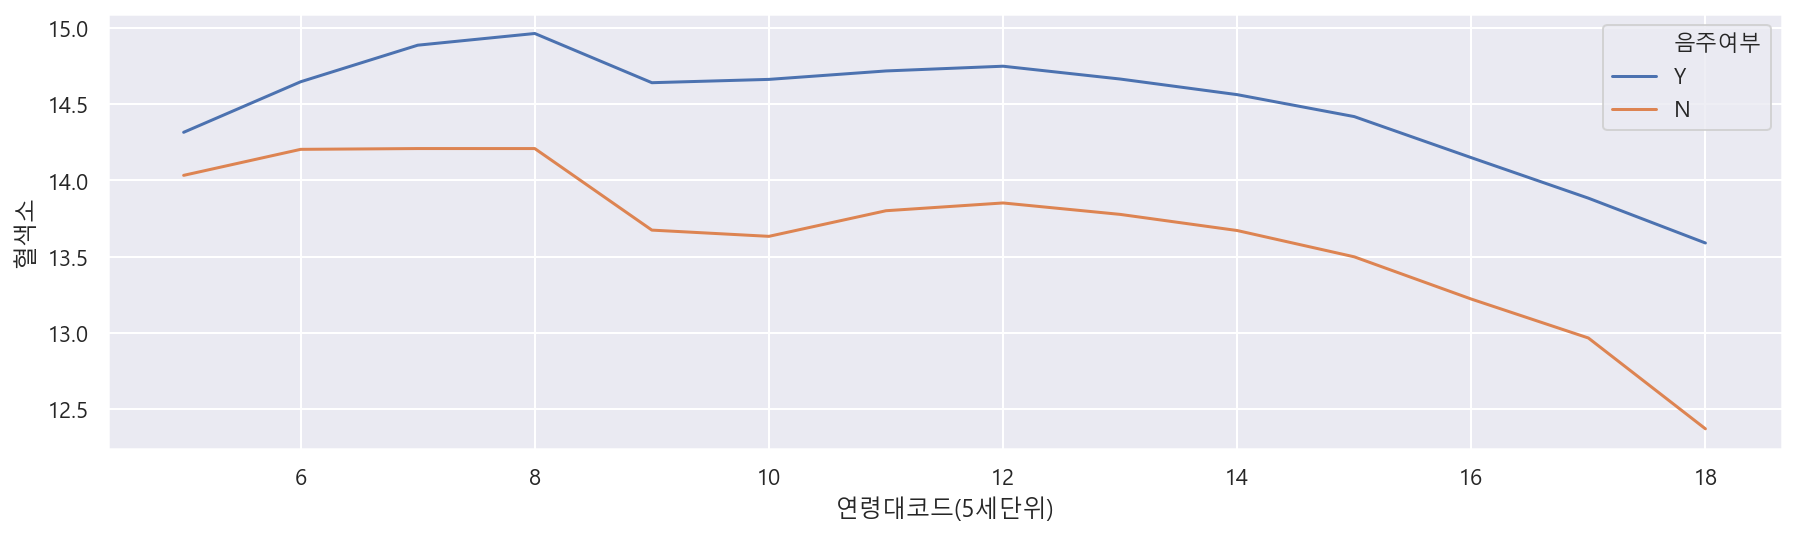

In [135]:
plt.figure(figsize=(15,4))
x = sns.lineplot(data=df, x="연령대코드(5세단위)", y="혈색소", hue="음주여부", ci=None)

## boxplot
- 이상치, 최솟값, 최댓값, 1/4분위값, 2/4분위값(50%), 3/4분위값을 확인할 수 있다.

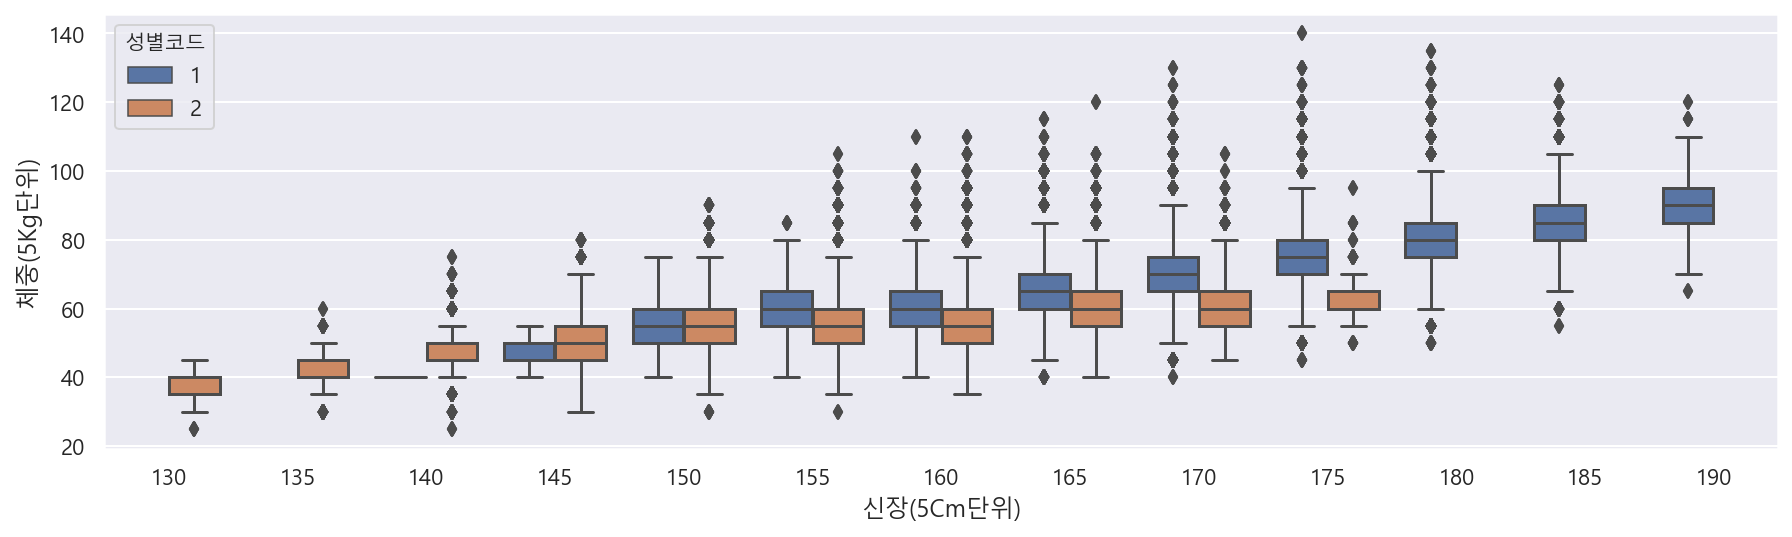

In [141]:
plt.figure(figsize=(15,4))
sns.boxplot(data=df, x="신장(5Cm단위)", y="체중(5Kg단위)", hue="성별코드")

## violinplot

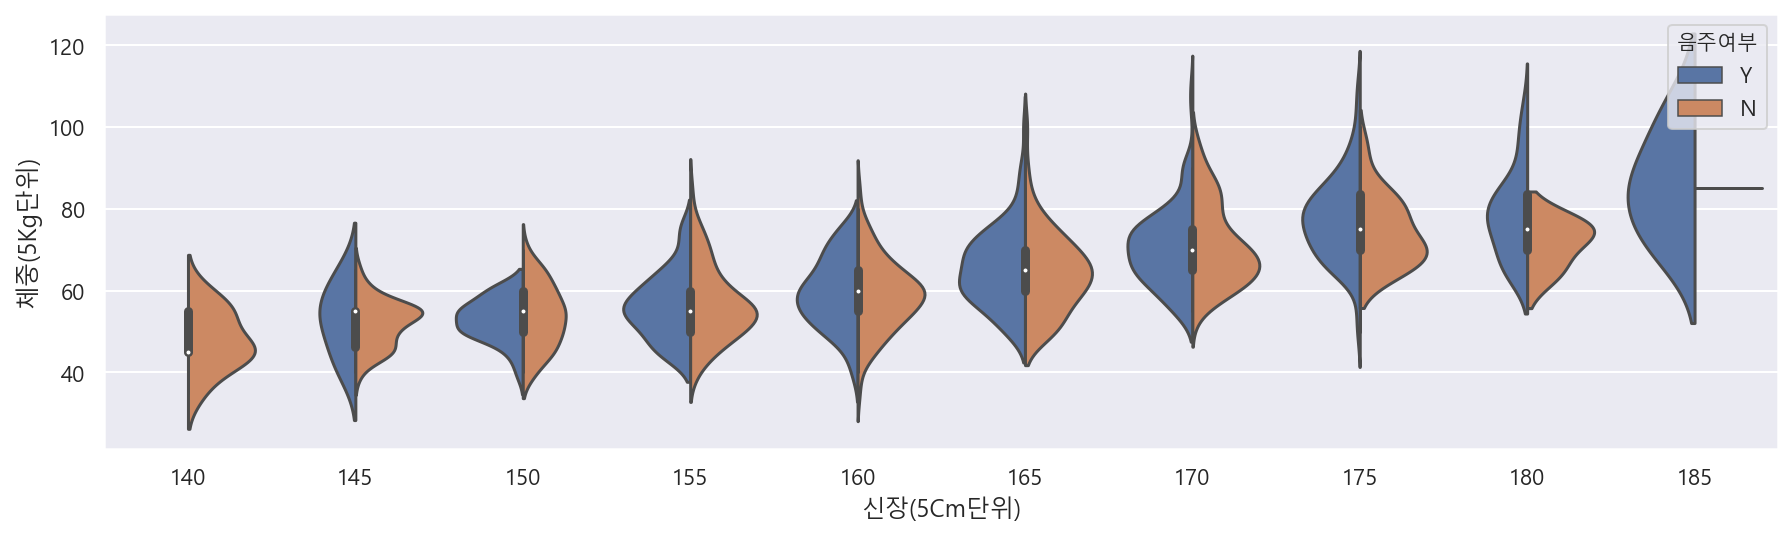

In [146]:
plt.figure(figsize=(15,4))
sns.violinplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg단위)", hue="음주여부", split=True)

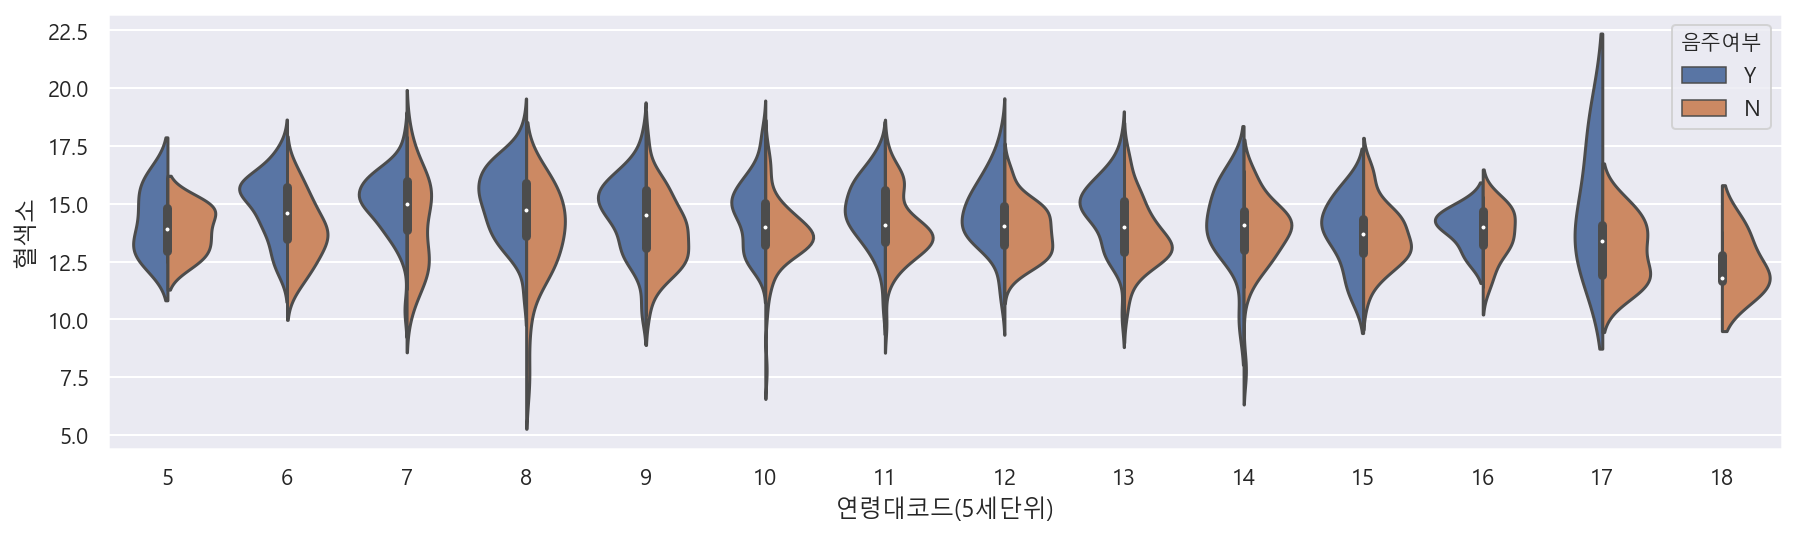

In [147]:
plt.figure(figsize=(15,4))
sns.violinplot(data=df_sample, x="연령대코드(5세단위)", y="혈색소", hue="음주여부", split=True)

## swarm plot
- 범주형 데이터를 산점도로 시각화할 때

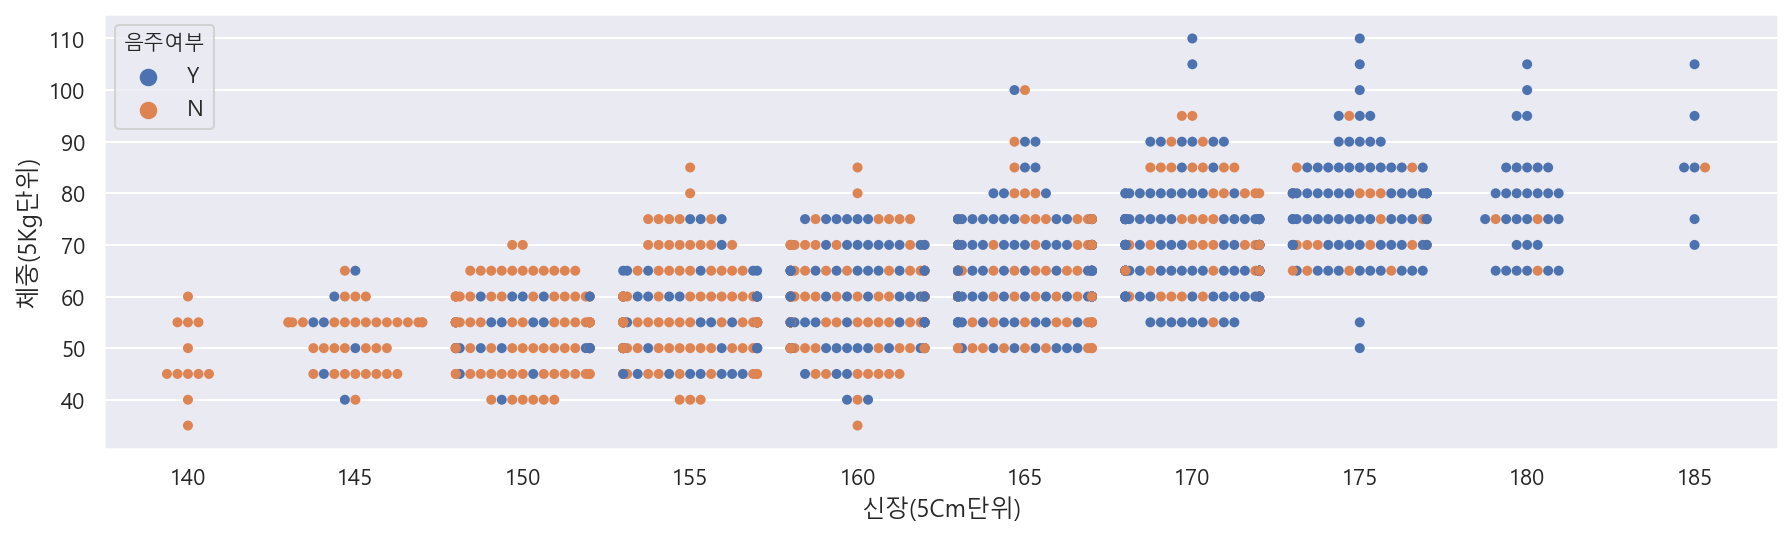

In [152]:
plt.figure(figsize=(15,4))
sns.swarmplot(data=df_sample, x="신장(5Cm단위)", y="체중(5Kg단위)", hue="음주여부")

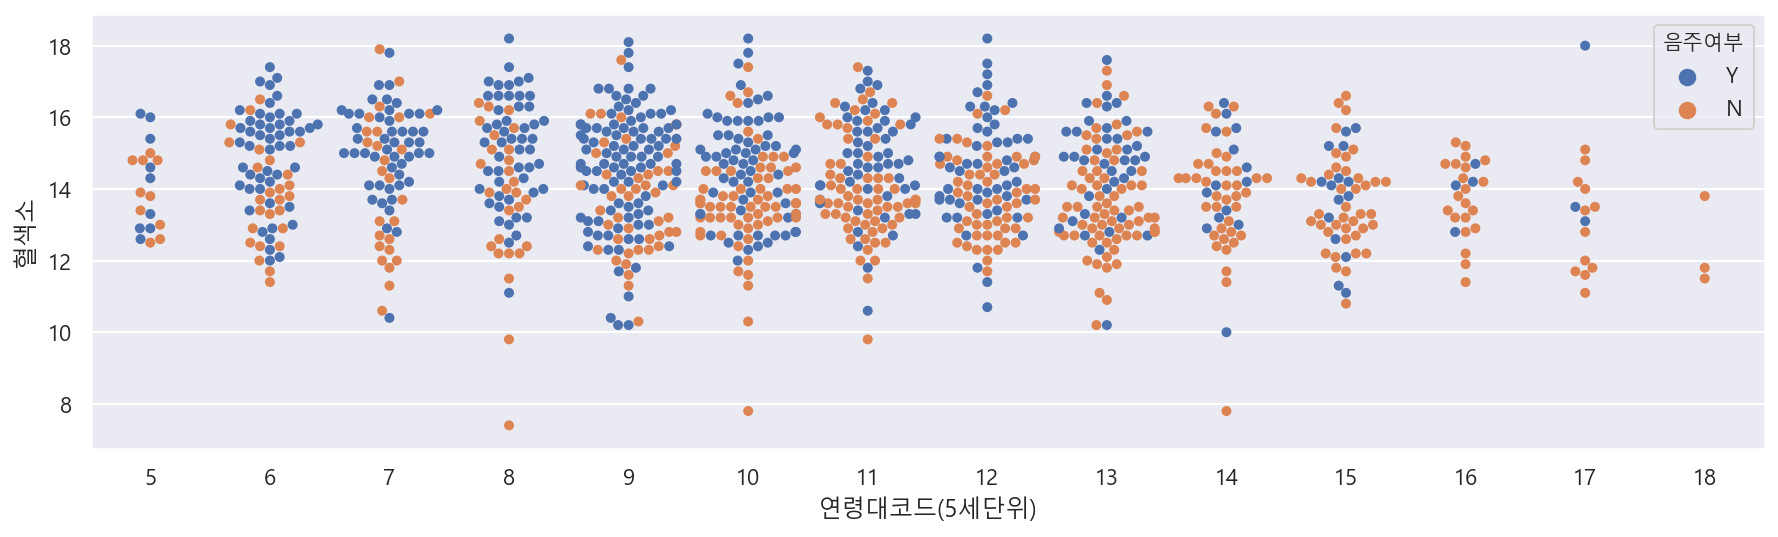

In [156]:
plt.figure(figsize=(15,4))
x = sns.swarmplot(data=df_sample, x="연령대코드(5세단위)", y="혈색소", hue="음주여부")

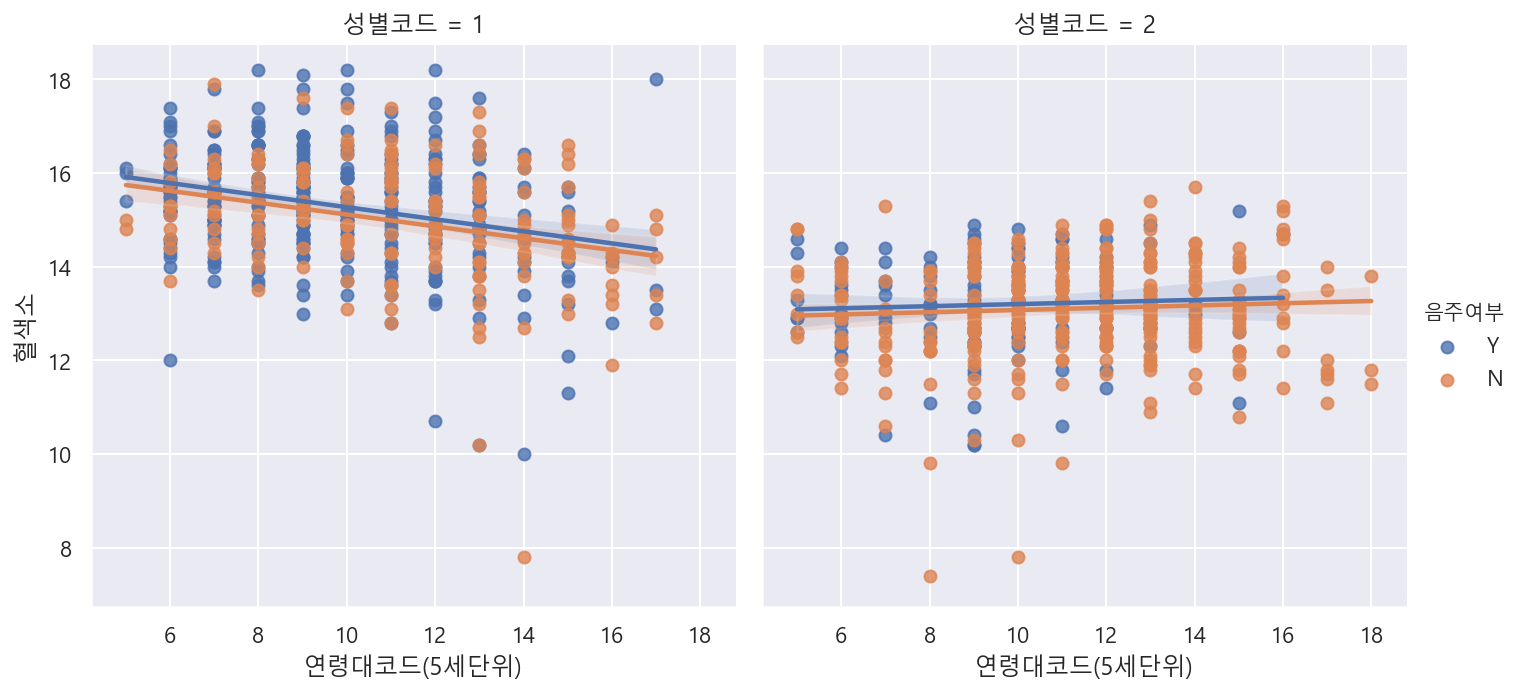

In [159]:
# lmplot --> 회귀선으로 상관관계를 분석할 수 있음
sns.lmplot(data=df_sample, x="연령대코드(5세단위)", y="혈색소", hue="음주여부", col="성별코드")